<a href="https://colab.research.google.com/github/LuciferX45/Deep-Learning-Labs/blob/main/DL_LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DL LAB 7**
# **Gautam Padhi**
# I034 B2
# BTech AI SEM V


In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
ytest.shape

(10000,)

In [ ]:
xtrain[0].shape

(28, 28)

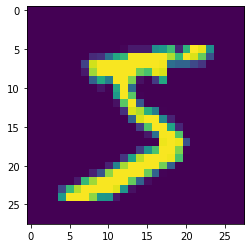

In [ ]:
plt.imshow(xtrain[0])

In [ ]:
#adding channel to the entire xtrain
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1) 

In [ ]:
#adding channel to the entire xtest
xtest = xtest.reshape(xtest.shape[0],28,28,1) 

In [ ]:
xtrain.shape

(60000, 28, 28, 1)

In [ ]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [ ]:
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)

In [ ]:
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

In [ ]:
ytrain_ohe = encoder.fit_transform(ytrain)

In [ ]:
ytest_ohe = encoder.fit_transform(ytest)

#Model 1

In [ ]:
input_shape = (28, 28, 1)
model = tf.keras.Sequential()
#Convolution layer
model.add(tf.keras.layers.Conv2D(20, kernel_size=(3, 3),padding = 'valid',activation='relu',input_shape=input_shape))
#Pooling layers
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#Flatten
model.add(tf.keras.layers.Flatten())
#Fully connected layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
#output
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()
history = model.fit(xtrain,ytrain_ohe,epochs = 10, validation_data=(xtest, ytest_ohe))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3380)              0         
                                                                 
 dense (Dense)               (None, 128)               432768    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 434,258
Trainable params: 434,258
Non-trainable params: 0
__________________________________________________

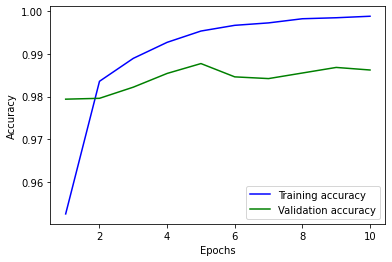

In [ ]:
epochs = [i for i in range(1,11)]
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
plt.plot(epochs, acc_train, 'b', label='Training accuracy')
plt.plot(epochs, acc_val, 'g', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

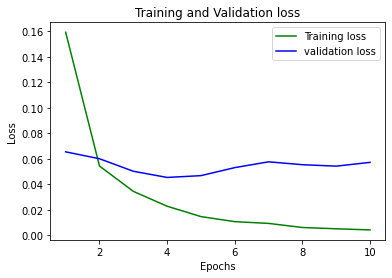

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Model 2

In [ ]:
input_shape = (28, 28, 1)
model = tf.keras.Sequential()
#Convolution layer
model.add(tf.keras.layers.Conv2D(20, kernel_size=(3, 3),padding = 'valid',activation='relu',input_shape=input_shape))
#Pooling layers
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#Convolution layers
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),padding = 'valid',activation='relu',input_shape=input_shape))
#Pooling layers
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#Dropout
model.add(tf.keras.layers.Dropout(0.25))
#Flatten
model.add(tf.keras.layers.Flatten())
#Fully connected layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
#output
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()
history = model.fit(xtrain,ytrain_ohe,epochs = 10, validation_data=(xtest, ytest_ohe))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        5792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 800)              

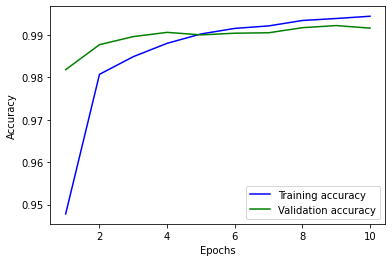

In [ ]:
epochs = [i for i in range(1,11)]
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
plt.plot(epochs, acc_train, 'b', label='Training accuracy')
plt.plot(epochs, acc_val, 'g', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

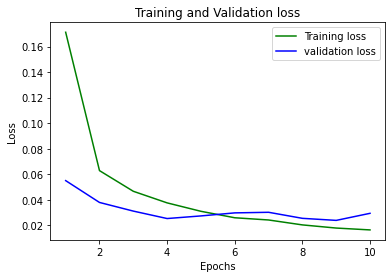

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#LeNet 5

In [ ]:
lenet_5_model = keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=input_shape, padding='same'), 
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), 
    tf.keras.layers.AveragePooling2D(), 
    tf.keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(84, activation='tanh'), 
    tf.keras.layers.Dense(10, activation='softmax') 
])

In [ ]:
lenet_5_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
lenet_5_model.summary()
history = lenet_5_model.fit(xtrain,ytrain_ohe,epochs = 10, validation_data=(xtest, ytest_ohe))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 120)              

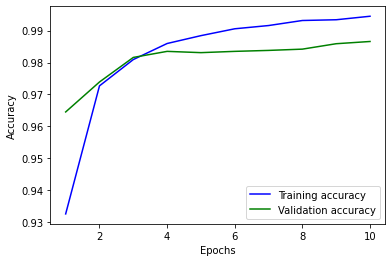

In [ ]:
epochs = [i for i in range(1,11)]
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
plt.plot(epochs, acc_train, 'b', label='Training accuracy')
plt.plot(epochs, acc_val, 'g', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

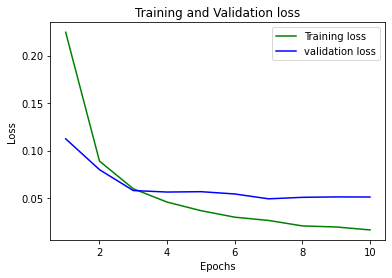

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()